<a href="https://colab.research.google.com/github/KelvinKilonzo97/Ailine-Booking-Prediction/blob/main/Airline_Booking_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# import machine learning frameworks
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB



In [ ]:
# import data
df = pd.read_csv("https://raw.githubusercontent.com/Kekyei/airline-booking-prediction/main/new_customer_booking_data.csv")
df.head()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,...,flight_weekend_weekend,trip_complexity_Other,trip_complexity_RoundTrip 1,trip_complexity_RoundTrip 2,trip_complexity_RoundTrip 3,trip_complexity_RoundTrip 4,origin_destination_AKLKUL Malaysia,origin_destination_AKLKUL New Zealand,origin_destination_MELSGN Australia,origin_destination_Other
0,1,1,1.964192,-0.298504,7,2,1,0,0,8,...,1,0,0,1,0,0,0,0,0,1
1,0,1,0.300695,-0.264575,3,2,0,0,0,8,...,1,0,1,0,0,0,0,0,0,1
2,1,1,1.753483,-0.196717,17,6,1,1,0,8,...,0,0,0,1,0,0,0,0,0,1
3,0,1,0.123256,0.108643,4,2,0,0,1,8,...,1,0,1,0,0,0,0,0,0,1
4,1,1,-0.187264,-0.196717,15,6,1,0,1,8,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
df.shape

(50000, 103)

In [ ]:
#split the data
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

In [ ]:
#resample
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
#split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# svm
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_acc)


SVM Accuracy: 0.589041095890411


In [ ]:
# random forest
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.9122229407960492


In [ ]:
#decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_acc)

Decision Tree Accuracy: 0.8578399670762538


In [ ]:
#logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_acc)


Logistic Regression Accuracy: 0.7802927861720266


In [ ]:
#svm
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_acc)

SVM Accuracy: 0.589041095890411


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Predict on the test sample
prediction = rf.predict(X_test)

# Calculate the accuracy of the model
tn, fp, fn, tp = metrics.confusion_matrix(y_test, prediction).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}")

print(f"Accuracy: {metrics.accuracy_score(y_test, prediction)*100}%")
print(f"Precision: {metrics.precision_score(y_test, prediction)*100}%")
print(f"Recall: {metrics.recall_score(y_test, prediction)*100}%")
print(f"F1 score: {metrics.f1_score(y_test, prediction)*100}%")

True positives: 7568
False positives: 496
True negatives: 7948
False negatives: 997
Accuracy: 91.22229407960492%
Precision: 93.84920634920636%
Recall: 88.35960303561005%
F1 score: 91.02170906248122%


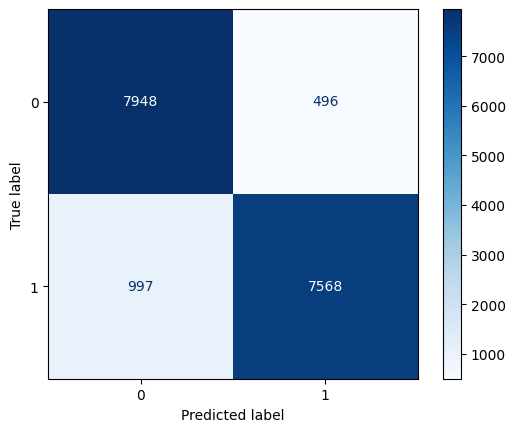

In [ ]:
# Plot the confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
#from sklearn.metrics import plot_confusion_matrix #This has been deprecated
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

#Use ConfusionMatrixDisplay instead
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()